In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
""" Your code hear: """
df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000
1091,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
1092,382,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,187750
1093,1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000


## 取出連續型特徵 (方便降維)

In [3]:
""" Your code hear: """
print(df.dtypes)
df = df.select_dtypes(exclude='object')
df = df.drop(['Id'],axis=1)
df

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,60.0,21930,5,5,2005,2005,0.0,0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,60,68.0,10769,8,5,2007,2007,0.0,20,0,...,144,105,0,0,0,0,0,4,2009,212000
2,120,34.0,4590,8,5,2006,2006,108.0,24,0,...,156,73,0,0,0,0,0,8,2007,209500
3,50,60.0,9600,5,8,1925,1994,0.0,0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,80,94.0,7819,6,5,1976,1976,0.0,422,127,...,144,0,0,0,0,0,0,3,2010,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,70,51.0,9842,5,6,1921,1998,0.0,0,0,...,183,0,301,0,0,0,0,5,2008,189000
1091,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
1092,20,60.0,7200,7,5,2006,2006,0.0,0,0,...,216,121,0,0,0,0,0,8,2006,187750
1093,20,88.0,10994,8,5,2005,2006,366.0,976,0,...,165,44,0,0,0,0,0,9,2009,257000


## 分析缺失值

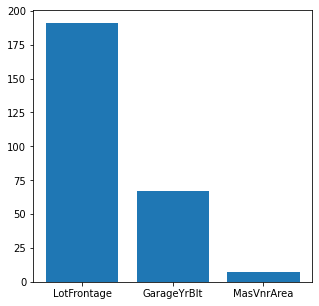

In [4]:
""" Your code hear: 練習印出缺失值圖表 """
is_null = (df.isnull().sum(axis=0)).sort_values(ascending=False) #多到少排列
is_null = is_null[is_null.values>0] #留下null>0
plt.figure(figsize=(5,5))
plt.bar(list(is_null.index),is_null.values)
#plt.xticks(rotation='vertical') #x-label文字轉成橫的
plt.show()

## 去除缺失值

In [5]:
""" Your code hear: 去除缺失值 """
x1= np.where(df['LotFrontage'].isnull()==True)[0]
x2= np.where(df['GarageYrBlt'].isnull()==True)[0]
x3= np.where(df['MasVnrArea'].isnull()==True)[0]
drop_idx= np.unique(np.concatenate((x1,x2,x3)))

df_after_delete= df.drop(index = drop_idx).reset_index(drop = True)
df_after_delete

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,60.0,21930,5,5,2005,2005,0.0,0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,60,68.0,10769,8,5,2007,2007,0.0,20,0,...,144,105,0,0,0,0,0,4,2009,212000
2,120,34.0,4590,8,5,2006,2006,108.0,24,0,...,156,73,0,0,0,0,0,8,2007,209500
3,50,60.0,9600,5,8,1925,1994,0.0,0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,80,94.0,7819,6,5,1976,1976,0.0,422,127,...,144,0,0,0,0,0,0,3,2010,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,70,51.0,9842,5,6,1921,1998,0.0,0,0,...,183,0,301,0,0,0,0,5,2008,189000
834,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
835,20,60.0,7200,7,5,2006,2006,0.0,0,0,...,216,121,0,0,0,0,0,8,2006,187750
836,20,88.0,10994,8,5,2005,2006,366.0,976,0,...,165,44,0,0,0,0,0,9,2009,257000


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [9]:
""" Your code hear: """
Y= np.array(df_after_delete['SalePrice'])

D=df_after_delete.drop(columns=['SalePrice'])
n_sample,n_features= D.shape

df_arr= np.array(D,dtype='float')
df_mean= np.mean(df_arr,axis=0)
df_std= np.std(df_arr,axis=0)

mean= np.tile(df_mean,n_sample).reshape(n_sample,n_features)
std= np.tile(df_std,n_sample).reshape(n_sample,n_features)
X= (df_arr-mean)/std

In [8]:
D

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,60.0,21930,5,5,2005,2005,0.0,0,0,...,372,100,40,0,0,0,0,0,7,2006
1,60,68.0,10769,8,5,2007,2007,0.0,20,0,...,578,144,105,0,0,0,0,0,4,2009
2,120,34.0,4590,8,5,2006,2006,108.0,24,0,...,627,156,73,0,0,0,0,0,8,2007
3,50,60.0,9600,5,8,1925,1994,0.0,0,0,...,250,0,0,84,0,0,0,0,7,2007
4,80,94.0,7819,6,5,1976,1976,0.0,422,127,...,672,144,0,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,70,51.0,9842,5,6,1921,1998,0.0,0,0,...,621,183,0,301,0,0,0,0,5,2008
834,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,468,90,0,205,0,0,0,0,4,2008
835,20,60.0,7200,7,5,2006,2006,0.0,0,0,...,572,216,121,0,0,0,0,0,8,2006
836,20,88.0,10994,8,5,2005,2006,366.0,976,0,...,620,165,44,0,0,0,0,0,9,2009


In [10]:
print('第1四分位數',np.percentile(Y,(25)))
print('第2四分位數',np.percentile(Y,(50)))
print('第3四分位數',np.percentile(Y,(75)))

第1四分位數 130125.0
第2四分位數 163995.0
第3四分位數 221000.0


In [11]:
#將sale_price轉為4個類別
Y_0_idx= np.where(Y<=np.percentile(Y,(25)))[0]
Y_1_idx= np.where(df_after_delete['SalePrice'].between(np.percentile(Y,(25)),np.percentile(Y,(50)),inclusive=True))[0]
Y_2_idx= np.where(df_after_delete['SalePrice'].between(np.percentile(Y,(50)),np.percentile(Y,(75)),inclusive=True))[0]
Y_3_idx= np.where(Y>np.percentile(Y,(75)))[0]

Y[Y_0_idx]='0'
Y[Y_1_idx]='1'
Y[Y_2_idx]='2'
Y[Y_3_idx]='3'

## 利用 TSNE 降維

In [12]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)

## 做圖

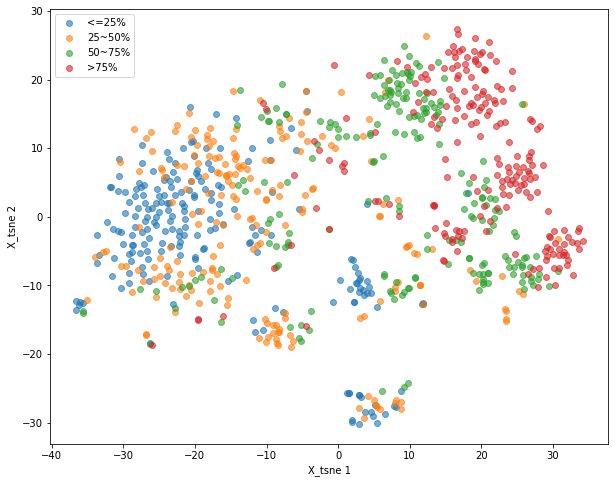

In [15]:
""" Your code hear: """
D= {'X_tsne 1':X_tsne[:,0],
      'X_tsne 2':X_tsne[:,1],
      'Sale Price':Y
     }
#X與Y合併
new_df=pd.DataFrame(D)

class_0=new_df[new_df['Sale Price']==0]
class_1=new_df[new_df['Sale Price']==1]
class_2=new_df[new_df['Sale Price']==2]
class_3=new_df[new_df['Sale Price']==3]

#畫圖
plt.figure(figsize=(10,8))
plt.scatter(class_0['X_tsne 1'],class_0['X_tsne 2'],alpha=0.6,label='<=25%') #alpha透明度
plt.scatter(class_1['X_tsne 1'],class_1['X_tsne 2'],alpha=0.6,label='25~50%')
plt.scatter(class_2['X_tsne 1'],class_2['X_tsne 2'],alpha=0.6,label='50~75%')
plt.scatter(class_3['X_tsne 1'],class_3['X_tsne 2'],alpha=0.6,label='>75%')

plt.legend(loc='upper left')
plt.xlabel('X_tsne 1')
plt.ylabel('X_tsne 2')
plt.show()



## 1. 請問同學從降維後的圖表中可以看出什麼現象？

In [ ]:
由左下到右上，可大概畫一條線。 50%為一個分水嶺，明顯分兩類。

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

In [ ]:
由於連續型資料有36 features 經過壓縮至2維要能呈現的形式，必會導致座標的重疊。